<a href="https://colab.research.google.com/github/kiryu-3/prosa/blob/main/Python/Python_Stats/Stats_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第2章 確率と確率分布

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install japanize-matplotlib
import japanize_matplotlib
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import geom
from scipy.stats import expon
from scipy.stats import poisson
import math

## 確率
ある事象が起こる確かさの程度を**確率**といいます。  
"ある事象"が起こる確率は **$P$**("ある事象") と表します。

※**試行**：その結果が予想通りになるかどうか実験や観察を行い試すこと  
※**事象**：試行によって起こった結果  
 
（確率の求め方についてはここでは詳しく触れませんので、[こちら](https://bit.ly/3DlMQpD)を参考にしてください）

### 確率変数
値が確率的に変動する変数を**確率変数**といいます。通常**$X$**で表します。  
それぞれの値に確率**$P(X)$**が対応しています。





例：サイコロを振って出た目   

|  サイコロの目 $X$ | 1 | 2 | 3 | 4 | 5 | 6 | 
| ---- | --- | --- | --- | --- | --- | --- | 
| 確率 $P(X)$ | $\frac{1}{6}$ | $\frac{1}{6}$ |  $\frac{1}{6}$ |  $\frac{1}{6}$ |  $\frac{1}{6}$ |  $\frac{1}{6}$ | 


例えば、「サイコロを投げて$3$の目が出る事象の確率は$1/6$である」ことは、  
以下のように書くことができます。    

$$
    P(X=3) = \frac{1}{6}　または　P(3) = \frac{1}{6}
$$

サイコロの目のように、離散的な（飛び飛びの）値をとる確率変数を**離散的確率変数**といいます。  
一方、連続の値をとる確率変数を**連続型確率変数**といいます。

## 確率分布
確率変数の値とそれに対応する確率を表した分布を**確率分布**といいます。  
見たほうが早いと思うので、さっそくサイコロの例の確率分布を描画してみましょう。

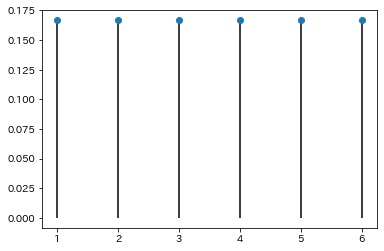

In [2]:
# 離散型確率分布
x = np.arange(1, 7)  # 確率変数は1～6
y = stats.randint(1, 7).pmf(x)  # yの値はすべて1/6
plt.plot(x, y, 'o')
plt.vlines(x, 0, y)

離散型確率分布の関数は**確率質量関数**(**PMF**)といいます。

連続型確率分布についても描画してみましょう。

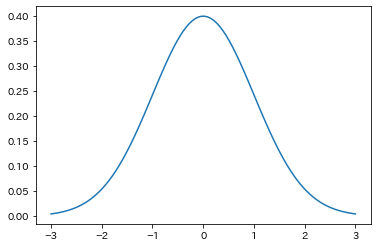

In [3]:
# 連続型確率分布
x = np.linspace(-3, 3, 100)
y = stats.norm.pdf(x=x,loc=0, scale=1)  # 平均値0,標準偏差1の正規分布の描画
plt.plot(x, y)

plt.show()

連続型確率分布の関数は**確率密度関数**(**PDF**)といいます。  
（今回は正規分布の描画ですが、第3章で説明があります）



この分布の高さを**確率密度**といいます（確率とはいいません）。  
例えば、$x=0$ の時は確率密度がおよそ $0.4$ となります。

確率変数が一定の幅を取る場合、**その面積が確率**となります。そして、**全面積は必ず$1$**となります。


### 累積分布関数
確率密度関数をある値まで確率を積み上げた値を返す関数を**累積分布関数**といいます。  
これも見たほうが早いと思います。

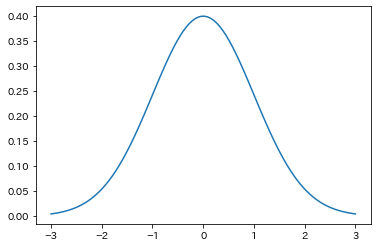

In [4]:
# 連続型確率分布①
x = np.linspace(-3, 3, 100)
y = stats.norm.pdf(x=x,loc=0, scale=1)  # 平均値0,標準偏差1の正規分布の描画
plt.plot(x, y)

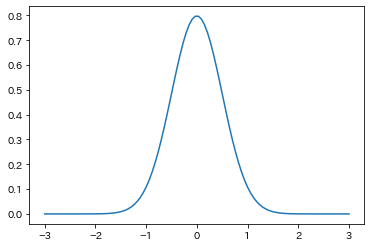

In [5]:
# 連続型確率分布②
x = np.linspace(-3, 3, 100)
y = stats.norm.pdf(x=x,loc=0, scale=0.5)  # 平均値0,標準偏差0.5の正規分布の描画
plt.plot(x, y)

上では2つの正規分布を描画しましたが、この2つの差はイマイチピンと来ないと思います。  
累積分布関数を描画することで、複数の分布の際を視覚的に理解することができます。

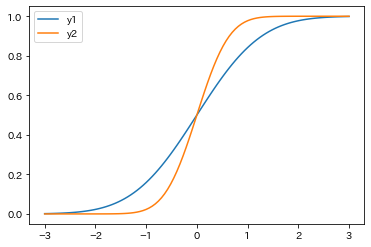

In [6]:
# 累積分布関数
x1 = np.linspace(-3, 3, 100)
y1 = stats.norm.cdf(x=x,loc=0, scale=1)
x2 = np.linspace(-3, 3, 100)
y2 = stats.norm.cdf(x=x,loc=0, scale=0.5)

plt.plot(x1, y1, label="y1")
plt.plot(x2, y2, label="y2")
plt.legend()

plt.show()

確率の上がり具合の差異などが分かりやすくなったと思います。

細かい話は[こちら](https://bellcurve.jp/statistics/course/6708.html)などを参照してください。

### 二項分布


確率分布には様々なものが存在しますが、そのほとんどが  
これから紹介する**二項分布**から派生したものです。 
 
他の分布については次の章で述べるとして、ここでは二項分布について触れます。

「コインを投げた時の結果は表か裏か」など、何かを行ったときに起こる結果が2つしかない試行を  
**ベルヌーイ試行**といいます。
  
そしてこの1回の事象が起こる確率を$p$とします。


このベルヌーイ試行を$n$回行った後に、ある事象が起こる回数が従う確率分布を**二項分布**といいます。  
起こる回数（$x$とします）が確率変数です。

二項分布の確率質量変数は次のような式になります。

$$
f(x) ={}_n C_x×p^x×(1-p)^{n-x}
$$

組み合わせの式などを復習したい方は[こちら](https://bellcurve.jp/statistics/course/5762.html)などを参考にしてください。

例：サイコロを3回投げて4がx回出る確率  

| 0回 | 1回 |
| --- | --- |
| $$f(0) = \frac{125}{216}$$ | $$f(1) = \frac{75}{216}$$ 
|$$\biggl(={}_3 C_0×\Bigl(\frac{1}{6}\Bigr)^{0}×\Bigl(1-\frac{1}{6}\Bigr)^{3-0}\biggr)$$ | $$\biggl(={}_3 C_1×\Bigl(\frac{1}{6}\Bigr)^{1}×\Bigl(1-\frac{1}{6}\Bigr)^{3-1}\biggr)$$ 

| 2回 | 3回 |
| --- | --- |
| $$f(2) = \frac{15}{216}$$ |  $$f(3) = \frac{1}{216}$$ |
| $$\biggl(={}_3 C_2×\Bigl(\frac{1}{6}\Bigr)^{2}×\Bigl(1-\frac{1}{6}\Bigr)^{3-2}\biggr)$$ | $$\biggl(={}_3 C_3×\Bigl(\frac{1}{6}\Bigr)^{3}×\Bigl(1-\frac{1}{6}\Bigr)^{3-3}\biggr)$$ |

二項分布をPythonで確かめてみましょう。




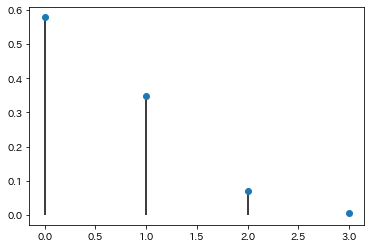

In [7]:
n = 3
x = np.arange(n+1)
y = stats.binom(n=n, p=1/6).pmf(x)  # n=x,p=1/6
plt.plot(x, y, 'o')
plt.vlines(x, 0, y)

二項分布の期待値$E(X)$と分散$V(X)$は以下の通りです。    
 



　　　　　　　　　　　　　　　　　　　　$E(X)=np$ 
   
　　　　　　　　　　　　　　　　　　　　$V(X)=np(1-p)$ 

[こちら](https://bit.ly/3E1XRhu)の演習問題の二項分布を描画してみましょう。

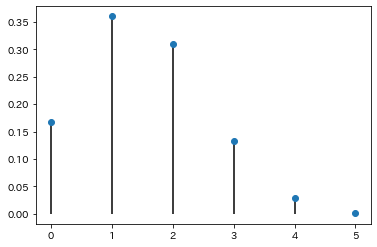

In [8]:
# 打率が3割のバッターが、5打席中3打席以上でヒットを打つ確率

n = 5
x = np.arange(n+1)
y = stats.binom(n=n, p=0.3).pmf(x)  # n=x,p=1/6
plt.plot(x, y, 'o')
plt.vlines(x, 0, y)

In [9]:
print("平均は{}".format(5*0.3))
print("標準偏差は{}".format(np.sqrt(5*0.3*(1-0.3))))

print("打率が3割のバッターは、平均5打席中1.5打席ヒットを打つ")
print("散らばりは1.02の程度になる")

平均は1.5
標準偏差は1.0246950765959597
打率が3割のバッターは、平均5打席中1.5打席ヒットを打つ
散らばりは1.02の程度になる


### ポワソン分布




二項分布の発展形で、実際によく応用される確率分布を**ポワソン分布**といいます。  

ポワソン分布は、二項分布の$np$を一定にして、$n$を**無限大**に大きく、$p$を限りなく小さくした極限です。  
（これ以降、$np$を$λ$と表記します）

ポワソン分布の数式は以下の通りです。

$$
P\bigl(x\bigr)=\frac{λ^xe^{-λ}}{x!}
$$

このポワソン分布を使って、**「ある時間内に平均$λ$回起こる事象がその時間内に$x$回起こる確率」**を  
求めることができます。（時間に限らないですが、よく使われます）

ポワソン分布をPythonで確かめてみましょう。



例題：製品Aの製造時には平均して$200$個に$1$個の割合で不良品発生  
　　　製造された製品Aを$10$個抜き取るとき、不良品が$1$個含まれる確率  
（不良品が含まれる個数がポアソン分布に従うものとする）

In [10]:
mu = 1/20  # 「10個に0.05個の割合で不良品発生」と単位を合わせる
k = 1
p1 = poisson.pmf(k=k, mu=mu)
print("不良品が1個含まれる確率は{}%".format(p1*100))

不良品が1個含まれる確率は4.756147122503571%


この値は大きいのでしょうか？分布を描画して確かめましょう。

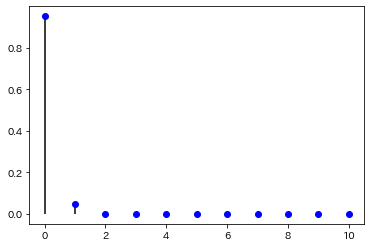

In [11]:
x = np.arange(11)
mu = 1/20
plt.plot(x,poisson.pmf(k=x,mu=mu),"bo")
plt.vlines(x,0,poisson.pmf(k=x,mu=mu))

ちょっと分かりずらいですねー  
以下の問題ではもう少し分かりやすくしようと思います。

[こちら](https://bit.ly/3E32g3N)の演習問題のポワソン分布を描画してみましょう。

In [12]:
# 40個に1個の割合で当たりが入っているチョコレート
# チョコレートを100個買ったときに、当たりが5つ含まれる確率

In [13]:
mu = 2.5  # 「100個に2.5個の割合で当たり」と単位を合わせる
k = 5
p1 = poisson.pmf(k=k, mu=mu)
print("当たりが5つ含まれる確率は{}%".format(p1*100))

当たりが5つ含まれる確率は6.680094289054267%


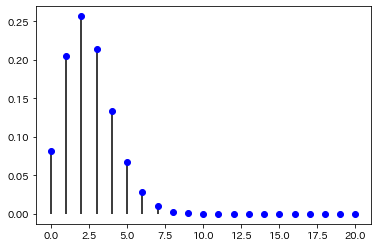

In [14]:
x = np.arange(21)
mu = 2.5
plt.plot(x,poisson.pmf(k=x,mu=mu),"bo")
plt.vlines(x,0,poisson.pmf(k=x,mu=mu))

plt.show()

当たりくじが2つ入っている確率が一番高いようです。

ポワソン分布の期待値$E(X)$と分散$V(X)$は以下の通りです。    


　　　　　　　　　　　　　　　　　　　　$E(X)=λ$  
　　　　　　　　　　　　　　　　　　　　$V(X)=λ$

### 幾何分布

成功確率がである独立なベルヌーイ試行を繰り返す時、  
初めて成功するまでの試行回数が従う確率分布を**幾何分布**といいます。

幾何分布の数式は以下の通りです。

$$
P\bigl(X=k\bigr)=(1-p)^{k-1}p　(k=1,2,3,…)
$$

例題：サイコロを投げて初めて1が出るまでの回数の確率

Text(0, 0.5, '確率')

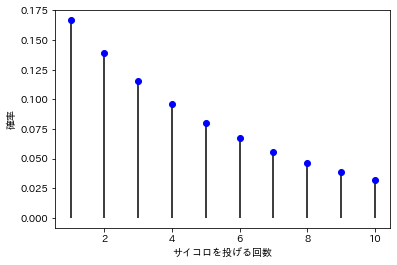

In [15]:
x = np.arange(1, 11)
y = geom.pmf(k=x, p=1/6)
plt.plot(x, y, 'bo')
plt.vlines(x, 0, y)
plt.xlabel("サイコロを投げる回数")
plt.ylabel("確率")

幾何分布の期待値$E(X)$と分散$V(X)$は以下の通りです。



　　　　　　　　　　　　　　　　　　　　$E(X)=\frac{1}{p}$  

　　　　　　　　　　　　　　　　　　　　$V(X)=\frac{1-p}{p^2}$

### 指数分布

ある時間(単位時間)内に平均$λ$回起こる事象が次に起こるまで(つまり発生間隔)が  
$x$単位時間である確率の分布を**指数分布**といいます。

指数分布の数式は以下の通りです。

$$
\text{$f(x)=$}
\begin{cases}
  \text{$λe^{-λx}　x\geq0$} \\
  \text{$0　x<0$}
\end{cases}
$$

例題：1時間に平均10人が来るお店に、ある客が来てから次の客が来るまでの時間が5分以内である確率

Text(0, 0.5, 'probability density')

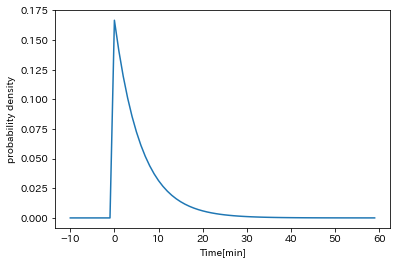

In [16]:
x = np.arange(-10, 60)
y = expon.pdf(x=x, scale=6)  # 1分間の平均回数の逆数
plt.plot(x, y)
plt.xlabel("Time[min]")
plt.ylabel("probability density")

$x$までの累積分布関数$F(x)$は次のようになります。  

$$
F(x) = P(X \geq x) = 1-e^{-λx}
$$

In [17]:
expon.cdf(x=5, scale=6)  # 約57%

0.5654017914929218

幾何分布の期待値$E(X)$と分散$V(X)$は以下の通りです。 



　　　　　　　　　　　　　　　　　　　　$E(X)=\frac{1}{λ}$  

　　　　　　　　　　　　　　　　　　　　$V(X)=\frac{1}{λ^2}$

## 補足
最後に、有名Youtuberヨビノリ先生の動画で参考になりそうなものを紹介しておきます。

①[ポアソン分布](https://bit.ly/3G2T0yd)  
②[指数分布](https://bit.ly/3Thbain)  
